# Práctica guiada: Clustering no supervisado con K-means (enfoque profesional)


> **Módulo:** Programación de Inteligencia Artificial
>
> **Bloque:** Aprendizaje no supervisado – Clustering
>
> **Algoritmo:** K-means
>
> **Tipo:** Práctica guiada con código incompleto

---

## Resultados de aprendizaje trabajados

RA2 – Desarrolla aplicaciones de IA utilizando entornos de modelado.

### Criterios de evaluación asociados:

* **RA2.c** Define el modelo a implementar
* **RA2.d** Implementa la aplicación
* **RA2.e** Evalúa resultados


---

## 1. ¿Qué es el clustering?

El **clustering** (o *agrupación*) es una técnica de **aprendizaje no supervisado** cuyo objetivo es **agrupar instancias de datos en conjuntos (clústeres) de forma que los elementos dentro de un mismo grupo sean más similares entre sí que con los de otros grupos**.

El clustering se utiliza en múltiples aplicaciones reales, entre ellas:

* **Búsqueda de similitud de imágenes**: se agrupan imágenes según sus características y, cuando el usuario aporta una nueva imagen, se asigna al clúster más cercano para devolver las *N* imágenes más similares.
* **Segmentación de imágenes**: se agrupan píxeles según su color u otras características y se reemplazan por el valor medio de su clúster, simplificando la imagen.
* **Análisis exploratorio de datos**: permite descubrir patrones y estructuras internas en los datos y analizar cada grupo por separado.
* **Reducción de dimensionalidad**: las características originales pueden sustituirse por la pertenencia o afinidad de cada instancia a los distintos clústeres.
* **Detección de anomalías**: las instancias que no encajan bien en ningún clúster suelen corresponder a valores atípicos.
* **Aprendizaje semisupervisado**: cuando solo se dispone de unas pocas etiquetas, el clustering puede ayudar a propagar esas etiquetas dentro de cada grupo.

Existen **distintos tipos de algoritmos de clustering** y **no hay una definición única de lo que constituye un clúster**, ya que depende del criterio de similitud y del objetivo del análisis.

En este cuaderno se trabajará con **K-means**, uno de los algoritmos de clustering más utilizados por su simplicidad, eficiencia y facilidad de interpretación.



### 2. K-means

El algoritmo **K-means** es un método de *clustering no supervisado* que divide un conjunto de **N muestras** $X = \{x_1, x_2, \dots, x_N\} $ **en K grupos** $($ C = \{C_1, C_2, \dots, C_K\} $.

Cada grupo está representado por un **centroide** $\mu_j $, que corresponde a la **media de las muestras asignadas a ese clúster**. Los centroides **no suelen coincidir con puntos reales del conjunto de datos**, aunque se encuentran en el mismo espacio de características.

El objetivo de K-means es encontrar los centroides que **minimizan la inercia**, definida como la suma de las distancias cuadráticas entre cada punto y el centroide del clúster al que pertenece:

$
\sum_{i=1}^{N} \min_{1 \le j \le K} \left| x_i - \mu_j \right|^2
$

La **inercia** (también llamada *función de distorsión*) es una **métrica interna del modelo** que mide qué tan compactos son los clústeres. Cuanto menor es su valor, más próximos están los puntos a sus respectivos centroides.
Su cálculo consiste en:

1. Medir la distancia entre cada punto y su centroide.
2. Elevar dicha distancia al cuadrado.
3. Sumar todos los valores obtenidos.

En la práctica, los centroides pueden encontrarse en dos situaciones:

* **Centroides conocidos**: si se conocen previamente, cada instancia se puede asignar directamente al clúster cuyo centroide esté más cercano. De forma equivalente, si se dispone de un conjunto de datos ya etiquetado, los centroides pueden calcularse como la media de los puntos de cada grupo.
* **Centroides desconocidos** (caso habitual): no se dispone ni de etiquetas ni de centroides iniciales. En este caso, K-means comienza con centroides iniciales (normalmente aleatorios) y **repite de forma iterativa** los siguientes pasos hasta que el modelo converge:

  1. Asignar cada punto al centroide más cercano.
  2. Recalcular los centroides como la media de los puntos asignados a cada clúster.

Este proceso continúa hasta que los centroides dejan de cambiar o el cambio es insignificante.





### 3. ¿Cómo funciona el algoritmo?

El algoritmo de clustering **K-means** suele partir de **centroides desconocidos** y utiliza un **proceso iterativo** para obtener el resultado final.
Las entradas del algoritmo son:

* El número de clústeres **K**
* El conjunto de datos, formado por las características de cada punto

El algoritmo comienza con una **estimación inicial de los K centroides**, que pueden generarse de forma aleatoria o seleccionarse a partir del propio conjunto de datos. A partir de ahí, K-means itera entre los siguientes dos pasos:

---

### 1. Paso de asignación

Cada centroide define un clúster. En este paso, **cada punto de datos se asigna al centroide más cercano**, normalmente utilizando la **distancia euclídea al cuadrado**.

De forma más formal, sea $ C = \{c_1, c_2, \dots, c_K\} $ el conjunto de centroides.
Cada punto $ x $ se asigna al clúster cuyo centroide minimiza la distancia:

$
\arg\min_{c_i \in C} ; |x - c_i|^2
$

Denotamos por $ S_i $ el **conjunto de puntos asignados al clúster i-ésimo**.

---

### 2. Paso de actualización del centroide

Una vez asignados los puntos, se recalculan los centroides.
Cada centroide se actualiza como la **media de todos los puntos asignados a su clúster**:

$
c_i = \frac{1}{|S_i|} \sum_{x \in S_i} x
$

---

El algoritmo repite de forma alterna los pasos de asignación y actualización hasta que se cumple un **criterio de parada**, por ejemplo:

* Ningún punto cambia de clúster entre iteraciones
* El cambio en la inercia es insignificante
* Se alcanza un número máximo de iteraciones

Este proceso **garantiza la convergencia**, aunque no necesariamente hacia el óptimo global, ya que el resultado depende de la inicialización de los centroides.

---



---

## 4. Convergencia e inicialización aleatoria

El algoritmo **K-means está garantizado para converger**, es decir, el proceso iterativo siempre finaliza tras un número finito de pasos.

Sin embargo, la convergencia **no garantiza que se alcance el óptimo global**. Dependiendo de la **inicialización de los centroides**, el algoritmo puede converger a **óptimos locales**, que corresponden a soluciones subóptimas en términos de inercia.

Por este motivo, ejecutar K-means **una sola vez** puede no ser suficiente. En la práctica, se realizan **varias ejecuciones con diferentes centroides iniciales aleatorios**, seleccionando finalmente la solución con menor inercia.

Esta es la razón por la que muchas implementaciones modernas de K-means (como en *scikit-learn*) repiten automáticamente el algoritmo varias veces (`n_init`) y devuelven el mejor resultado obtenido.

<div style="text-align:center">
    <img style="width:50%" src="img/K-means_convergence.gif">
</div>



---


## A) Ejemplo guiado (dataset sintético)


En esta ejemplo vas a ver como **aplicar K-means siguiendo un flujo de trabajo realista**, similar al que se utiliza hoy en día en proyectos de Machine Learning.


No se trata solo de ejecutar el algoritmo, sino de:


- Preparar correctamente los datos
- Elegir razonadamente el número de clusters
- Interpretar los resultados obtenidos
- Validar la estabilidad del clustering




## 1. Importación de librerías


Comienza importando las librerías necesarias para trabajar con datos, visualización y clustering.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    adjusted_rand_score
)
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings("ignore")

## 2. Creación del dataset


Para centrarnos en el algoritmo, utilizaremos un **dataset sintético**, al que añadiremos ruido y valores atípicos.


Completa el siguiente código para generar los datos:

In [2]:
# generar un dataset con make_blobs
X, y_true = make_blobs(
    n_samples=1500,
    centers=4,
    cluster_std=[1.0, 2.5, 0.8, 1.5],
    random_state=42
)

df = pd.DataFrame(X, columns=["feature_1", "feature_2"])


# convertir el array en un DataFrame con dos columnas
df = pd.DataFrame(X, columns=["feature_1", "feature_2"])


Añade ahora algunos **outliers artificiales**:

In [3]:
# generar puntos aleatorios como outliers

rng = np.random.default_rng(42)
outliers = rng.uniform(low=-10, high=10, size=(30, 2))
# añadirlos al DataFrame original
df = pd.concat([df, pd.DataFrame(outliers, columns=df.columns)], ignore_index=True)

---


## 3. Análisis exploratorio inicial


Antes de aplicar cualquier algoritmo, **visualizamos los datos**.

Ahora entrenaremos el algoritmo de clustering K-means sobre este dataset:

,feature_1,feature_2
count,1530.000000,1530.000000
mean,-3.245058,2.880968
std,5.537487,6.388377
min,-12.959585,-9.852755
25%,-7.561924,-4.630395
50%,-4.540831,5.417917
75%,0.731349,8.326387
max,11.040090,13.212879


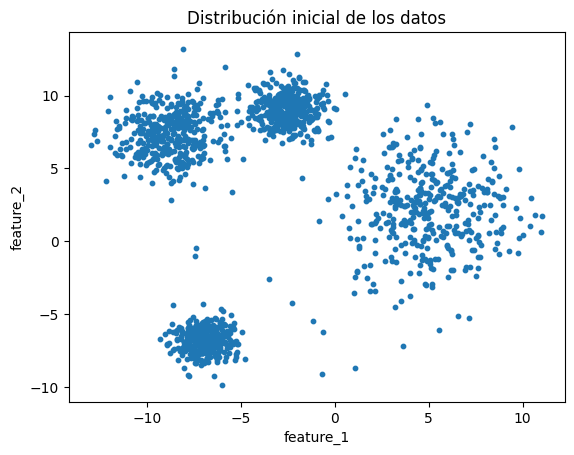

In [4]:
#  mostrar estadísticas básicas del DataFrame
display(df.describe())



# realizar un scatter plot de las dos variables
plt.scatter(df["feature_1"], df["feature_2"], s=10)
plt.title("Distribución inicial de los datos")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()


<div style="background-color:green;color:white">

<br>

❓ **Pregunta**:

 ¿Detectas visualmente posibles grupos? 
- Si, yo detecto 4 grupos.
 
 ¿Se aprecian valores atípicos?
- En los grupos se observan puntos alejados lo que podría sugerir valores atípicos.


<br>

---


## 4. Preprocesado de los datos


K-means es muy sensible a la escala de las variables. Por ello:


- Aplicaremos **escalado**
- Usaremos `RobustScaler` en vez de StandardScaler (z-score) para reducir el impacto de **outliers**


Completa el pipeline de preprocesado:

In [5]:
# crear un Pipeline con RobustScaler
preprocess = Pipeline([
    ("scaler", RobustScaler())
])


#  ajustar y transformar el DataFrame
X_scaled = preprocess.fit_transform(df)


---


## 5. Selección del número de clusters


No existe un único criterio para elegir el valor de **K**. En esta práctica compararás varias métricas:


- Inercia (Elbow)
- Silhouette score
- Calinski–Harabasz
- Davies–Bouldin


Completa el siguiente bucle:

In [6]:
# Definimos el rango de valores de k (número de clusters) a evaluar: de 2 a 10
# Se empieza en 2 porque muchas métricas no están definidas para k = 1
K_RANGE = range(2, 11)

# Listas para almacenar las métricas obtenidas para cada valor de k
inertias = []      # Inercia del modelo (método del codo)
silhouettes = []  # Coeficiente silhouette
calinski = []     # Índice de Calinski-Harabasz
davies = []       # Índice de Davies-Bouldin

# Iteramos sobre cada valor de k
for k in K_RANGE:
    # Creamos el modelo KMeans con k clusters
    # n_init="auto" selecciona automáticamente el número de inicializaciones
    # random_state fija la semilla para reproducibilidad
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)

    # Ajustamos el modelo a los datos escalados y obtenemos las etiquetas
    # de cluster para cada observación
    labels_k = kmeans.fit_predict(X_scaled)

    # Guardamos la inercia (suma de las distancias cuadradas a los centroides)
    inertias.append(kmeans.inertia_)

    # Calculamos y almacenamos el coeficiente silhouette,
    # que mide la cohesión interna y separación entre clusters
    silhouettes.append(silhouette_score(X_scaled, labels_k))

    # Calculamos y almacenamos el índice de Calinski-Harabasz,
    # que relaciona la dispersión entre clusters con la dispersión interna
    calinski.append(calinski_harabasz_score(X_scaled, labels_k))

    # Calculamos y almacenamos el índice de Davies-Bouldin,
    # que evalúa la similitud entre clusters (valores menores son mejores)
    davies.append(davies_bouldin_score(X_scaled, labels_k))


---


## 6. Visualización de métricas


Representa gráficamente las métricas calculadas para ayudarte a decidir el valor de K.

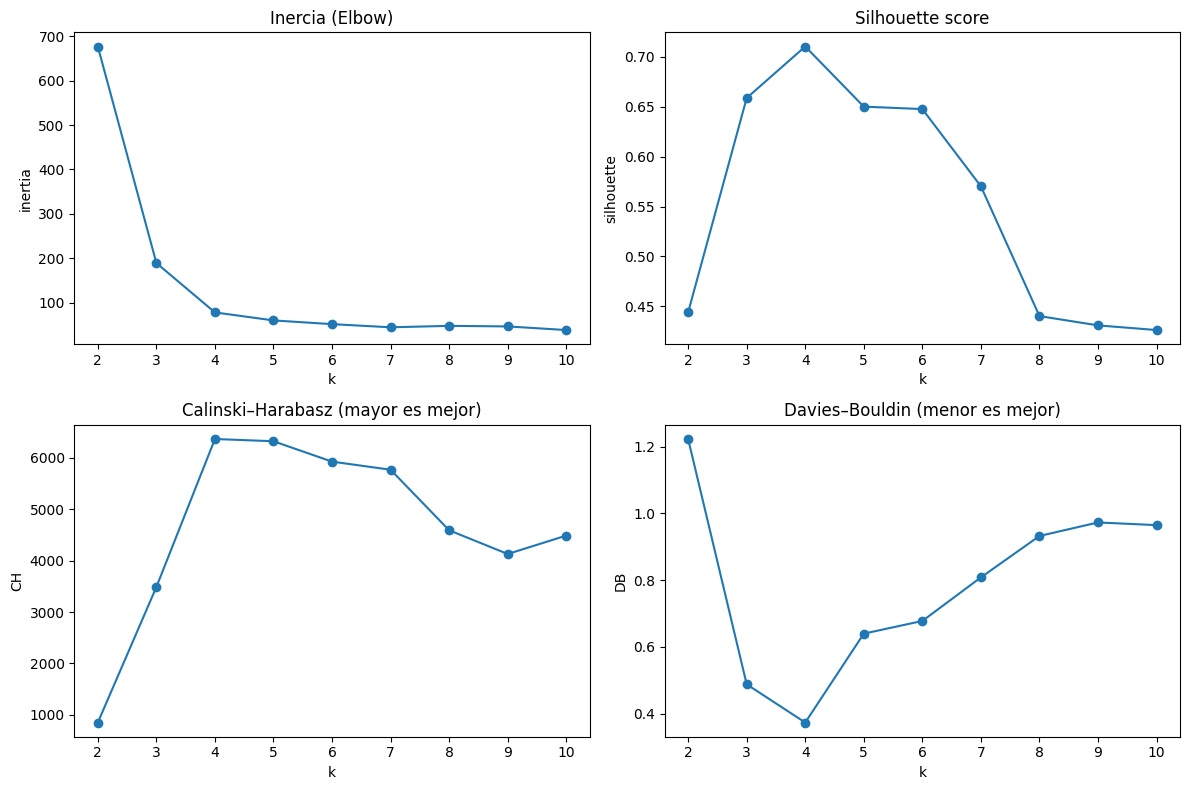

In [7]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(list(K_RANGE), inertias, marker="o")
plt.title("Inercia (Elbow)")
plt.xlabel("k")
plt.ylabel("inertia")

plt.subplot(2, 2, 2)
plt.plot(list(K_RANGE), silhouettes, marker="o")
plt.title("Silhouette score")
plt.xlabel("k")
plt.ylabel("silhouette")

plt.subplot(2, 2, 3)
plt.plot(list(K_RANGE), calinski, marker="o")
plt.title("Calinski–Harabasz (mayor es mejor)")
plt.xlabel("k")
plt.ylabel("CH")

plt.subplot(2, 2, 4)
plt.plot(list(K_RANGE), davies, marker="o")
plt.title("Davies–Bouldin (menor es mejor)")
plt.xlabel("k")
plt.ylabel("DB")

plt.tight_layout()
plt.show()



<div style="background-color:green;color:white">

<br>

 ❓ **Pregunta**: 

¿Todas las métricas sugieren el mismo valor de K? 
- Si, todos k = 4

¿Cuál elegirías y por qué?
- Yo eligiría la de silhouette de K = 4 porque:
    - Cohesion: Qué tan juntos están los puntos de un cluster.
    - Separación: Qué tan lejos está de otros clusters.

<br>

---

### Silhouette plot

El **coeficiente silhouette** mide qué tan bien está asignada **cada muestra** a su clúster.

* Valores **cercanos a 1** indican que la muestra está bien agrupada y lejos de otros clústeres.
* Valores **cercanos a 0** indican que la muestra está en la frontera entre dos clústeres.
* Valores **negativos** indican que la muestra podría estar mejor asignada a otro clúster.

En un buen clustering **no es necesario que todas las muestras tengan valores cercanos a 1**.
Lo importante es que **la mayoría de las muestras tengan valores positivos** y que haya **pocas muestras mal asignadas**.

El siguiente gráfico permite **analizar la calidad interna de los clústeres** para el valor de **K elegido**, complementando al silhouette medio.

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html



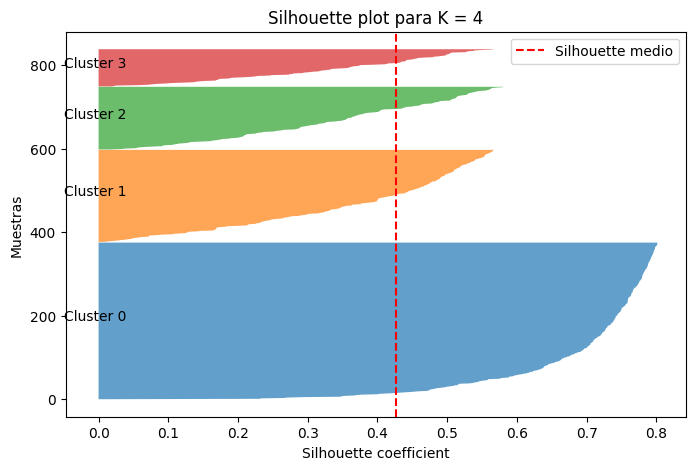

In [8]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt

labels = kmeans.fit_predict(X_scaled)
K_OPT = 4

# Cálculo del silhouette por muestra
silhouette_vals = silhouette_samples(X_scaled, labels)

fig, ax = plt.subplots(figsize=(8, 5))

y_lower = 0
for i in range(K_OPT):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()

    size_cluster = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster

    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        cluster_silhouette_vals,
        alpha=0.7
    )

    ax.text(-0.05, y_lower + 0.5 * size_cluster, f"Cluster {i}")
    y_lower = y_upper

# Línea vertical con el silhouette medio
silhouette_avg = silhouette_score(X_scaled, labels)
ax.axvline(silhouette_avg, color="red", linestyle="--", label="Silhouette medio")

ax.set_title(f"Silhouette plot para K = {K_OPT}")
ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Muestras")
ax.legend()
plt.show()


---


## 7. Entrenamiento del modelo final


Elige un valor de **K** razonable según el apartado anterior y entrena el modelo definitivo.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [9]:
K_OPT = 4  # (en este dataset suele encajar bien)

kmeans = KMeans(n_clusters=K_OPT, n_init="auto", random_state=42)
labels = kmeans.fit_predict(X_scaled)

df["cluster"] = labels

---


## 8. Interpretación de los clusters


Un clustering **no es útil si no se interpreta**.


Completa el siguiente análisis:

feature_1                           feature_2                      \
             mean    median       std count      mean    median       std   
cluster                                                                     
0       -2.518492 -2.493024  1.090689   390  8.899033  8.956051  1.241520   
1        5.105555  4.942226  2.180218   382  2.106294  2.333708  2.800087   
2       -6.855880 -6.901242  0.998809   384 -6.784408 -6.851230  0.946049   
3       -8.824576 -8.751664  1.404342   374  7.320500  7.252975  1.529536   

               
        count  
cluster        
0         390  
1         382  
2         384  
3         374

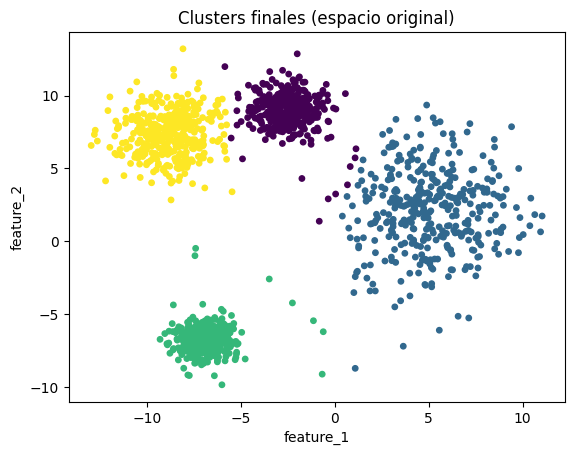

In [10]:
cluster_profile = df.groupby("cluster")[["feature_1", "feature_2"]].agg(["mean", "median", "std", "count"])
display(cluster_profile)

plt.scatter(df["feature_1"], df["feature_2"], c=df["cluster"], s=15)
plt.title("Clusters finales (espacio original)")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()


<div style="background-color:green;color:white">

<br>

 ❓ **Pregunta**: ¿Qué caracteriza a cada cluster? Describe al menos dos rasgos por grupo.
- Cluster 0:
    - Presenta valores moderadamente negativos en feature_1.
    - Tiene valores altos en feature_2, formando un grupo relativamente compacto.

- Cluster 1:
    - Se caracteriza por valores positivos en feature_1.
    - Muestra valores moderados en feature_2 y es el cluster más disperso.

- Cluster 2:
    - Agrupa observaciones con valores bajos (negativos) en ambas variables.
    - Es un grupo muy compacto y homogéneo.

- Cluster 3
    - Presenta valores muy negativos en feature_1.
    - Tiene valores altos en feature_2, con dispersión intermedia.

 <br>

---


## 9. Visualización con PCA


Cuando hay más de dos variables, se suele usar **PCA** para visualizar los clusters.

### 9.1 Añadimos una tercera variable

Añadimos una tercera variable correlacionada con las otras dos.

In [11]:
# Añadimos una tercera variable correlacionada
rng = np.random.default_rng(42)
df["feature_3"] = (
    0.5 * df["feature_1"] 
    - 0.3 * df["feature_2"] 
    + rng.normal(0, 0.5, size=len(df))
)


### 9.2 Preprocesado

Aplicamos de nuevo escalado

In [12]:
X_scaled = preprocess.fit_transform(df[["feature_1", "feature_2", "feature_3"]])


### 9.2 Interpretación de clusters

Este análisis agrupa los datos por clúster y calcula estadísticas descriptivas para cada uno, permitiendo interpretar qué caracteriza a cada grupo y compararlos entre sí.

In [13]:
cluster_profile = df.groupby("cluster")[[
    "feature_1", "feature_2", "feature_3"
]].agg(["mean", "std", "count"])


### 9.3 Visualización 3D de los clusters

In [14]:
!pip install plotly
!pip install -U nbformat==4.2.0 ipython



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 9.9.0
    Uninstalling ipython-9.9.0:
      Successfully uninstalled ipython-9.9.0

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


### 9.4 aplicamos PCA para visualizarlo  en dos dimensiones.

In [15]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x="feature_1",
    y="feature_2",
    z="feature_3",
    color="cluster",
    opacity=0.8,
    title="Clusters en el espacio 3D (interactivo)"
)
import plotly.io as pio
pio.renderers.default = "browser"   # abre en el navegador
fig.show()


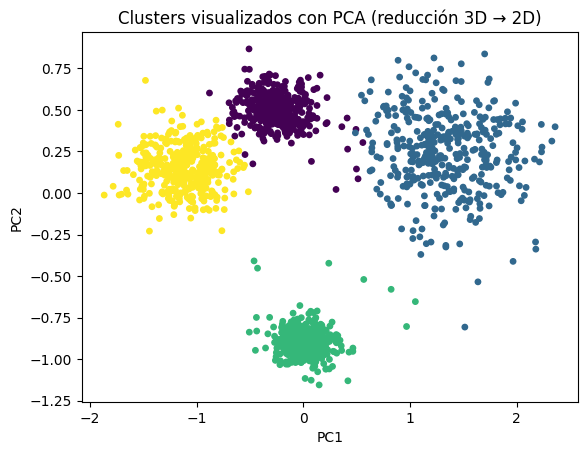

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["cluster"], s=15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters visualizados con PCA (reducción 3D → 2D)")
plt.show()


---


## 10. Estabilidad y reproducibilidad


K-means depende de la inicialización. Es buena práctica comprobar la estabilidad del clustering, es decir, si K-means obtiene los mismos grupos aunque cambie la inicialización.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html


Vamos a comprobar si los resultados son estables.

In [17]:
labels_list = []

for seed in range(10):
    km = KMeans(n_clusters=K_OPT, n_init="auto", random_state=seed)
    labels_list.append(km.fit_predict(X_scaled))

# ARI respecto a la ejecución con seed=0
aris = [adjusted_rand_score(labels_list[0], lbl) for lbl in labels_list[1:]]
display(pd.Series(aris, name="ARI_vs_seed0"))



0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
Name: ARI_vs_seed0, dtype: float64

Visualizamos la gráfica

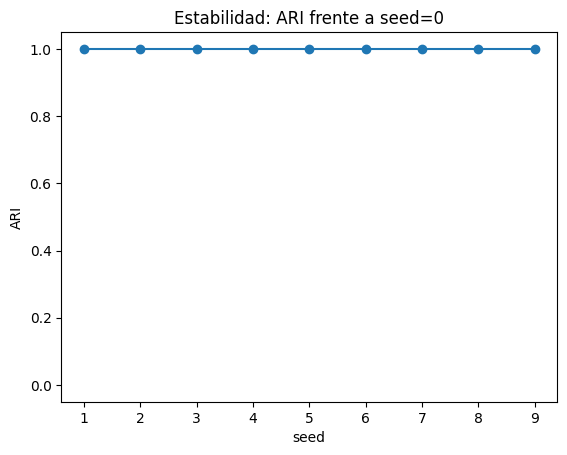

In [18]:
plt.plot(range(1, 10), aris, marker="o")
plt.title("Estabilidad: ARI frente a seed=0")
plt.xlabel("seed")
plt.ylabel("ARI")
plt.ylim(-0.05, 1.05)
plt.show()

<div style="background-color:green;color:white">

<br>

❓ **Pregunta**: 

¿Son estables los clusters? 
- Los clusters son estables, ya que el índice ARI se mantiene cercano a 1 para distintas semillas, indicando una alta consistencia en la asignación de los grupos. 

¿Qué indica un ARI alto o bajo?
- Un ARI alto refleja gran similitud entre particiones, mientras que un ARI bajo indica inestabilidad o agrupaciones cercanas al azar.

<br>

---

## 11. Escalabilidad: `MiniBatchKMeans`

Cuando el dataset es grande, entrenar `KMeans` clásico puede ser **muy costoso en tiempo y memoria**, ya que en cada iteración calcula la distancia de **todas las muestras** a **todos los centroides**.

Un dataset puede considerarse **grande para K-means** cuando se cumple alguna de estas situaciones:

* Tiene **decenas o cientos de miles de muestras**
* Tiene **muchas variables** (alta dimensionalidad)
* El entrenamiento con `KMeans` tarda varios segundos o minutos
* El consumo de memoria empieza a ser relevante

En estos casos, se utiliza **`MiniBatchKMeans`**, que:

* procesa **pequeños lotes (batches)** de datos en cada iteración
* reduce mucho el tiempo de entrenamiento
* obtiene resultados **muy similares** a `KMeans` clásico

El precio a pagar es una **ligera pérdida de precisión**, que normalmente es aceptable en problemas reales de gran escala.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html

En este ejemplo el dataset es pequeño, por lo que `MiniBatchKMeans` se usa **solo con fines demostrativos**, para mostrar cómo se aplicaría el mismo enfoque en un escenario real con grandes volúmenes de datos.

---



In [19]:
# Creamos un modelo MiniBatchKMeans con el número óptimo de clusters (K_OPT)
# batch_size=256 indica cuántas muestras se usan en cada mini-lote,
# lo que acelera el entrenamiento en conjuntos de datos grandes
# random_state fija la semilla para obtener resultados reproducibles
mbk = MiniBatchKMeans(n_clusters=K_OPT, batch_size=256, random_state=42)

# Ajustamos el modelo a los datos escalados y obtenemos
# la etiqueta de cluster asignada a cada observación
labels_mbk = mbk.fit_predict(X_scaled)

# Calculamos el Adjusted Rand Index (ARI) entre:
# - las etiquetas del clustering de referencia (labels, por ejemplo KMeans)
# - las etiquetas obtenidas con MiniBatchKMeans
# El ARI mide la similitud entre ambas particiones, corrigiendo el azar
ari_mbk = adjusted_rand_score(labels, labels_mbk)

# Mostramos el valor del ARI
# Valores cercanos a 1 indican alta concordancia entre ambos clusterings
print("ARI (KMeans vs MiniBatchKMeans):", ari_mbk)


ARI (KMeans vs MiniBatchKMeans): 0.9723261697370246


## 12. Conclusiones

<div style="background-color:green;color:white">

<br>

Redacta brevemente:


- Qué has aprendido sobre K-means
    - K-means es un algoritmo de clustering no supervisado que agrupa los datos según distancia, buscando minimizar la variabilidad dentro de cada cluster.
    - Es rápido y eficiente cuando los grupos son compactos y bien separados.
    - El resultado puede depender de la inicialización, aunque en este caso se ha comprobado que los clusters son estables.

- Qué pasos son imprescindibles antes de clusterizar
    - Explorar y visualizar los datos para detectar patrones y valores atípicos.
    - Escalar las variables, ya que K-means es sensible a la escala.
    - Elegir el número de clusters, usando métricas como el método del codo o el coeficiente de silhouette.
    - Comprobar la calidad y estabilidad del clustering obtenido.

- Qué limitaciones has detectado
    - Es necesario definir k previamente, lo cual no siempre es evidente.
    - Es sensible a outliers, que pueden distorsionar los centroides.
    -  Asume clusters de forma esférica y tamaño similar, por lo que no funciona bien con formas complejas.
    - Puede verse afectado si las variables no están bien escaladas.

<br>

# B) Segmentación de clientes (Mall_Customers)


> **Tipo:** Ejercicio práctico evaluable

> **Dataset:** `Mall_Customers.csv`

> **Objetivo:** Aplicar K-means a un **problema real de negocio** (segmentación de clientes)


> **Contexto**

> Un centro comercial desea **segmentar a sus clientes** para diseñar campañas de marketing diferenciadas según su comportamiento de gasto y perfil.


### 1. Carga y exploración del dataset

Carga el fichero `Mall_Customers.csv` y realiza un análisis exploratorio inicial.

In [20]:
df = pd.read_csv("./K-Means/data/Mall_Customers.csv")



<div style="background-color:green;color:white">

<br>

- Haz un breve  Análisis Envolvente de Datos  (DEA).

<br>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [23]:
df.isnull().sum() 

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

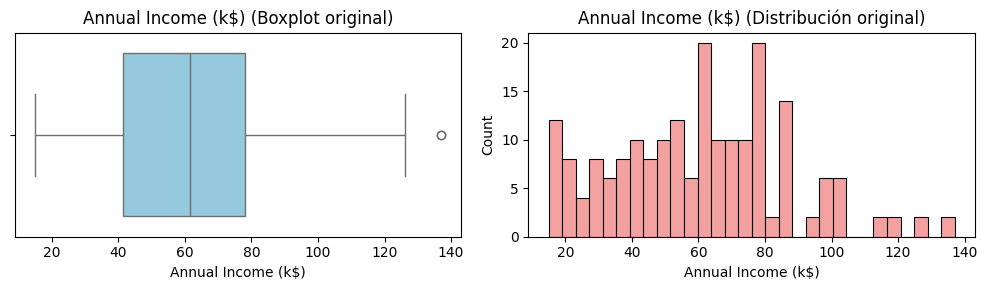

In [24]:
import seaborn as sns 
cols = ["Annual Income (k$)"] 
for col in cols: 
    fig, axes = plt.subplots(1, 2, figsize=(10, 3)) 
    sns.boxplot(x=df[col], ax=axes[0], color='skyblue') 
    axes[0].set_title(f'{col} (Boxplot original)') 
    sns.histplot(df[col], bins=30, ax=axes[1], color='lightcoral') 
    axes[1].set_title(f'{col} (Distribución original)') 
plt.tight_layout() 
plt.show() 

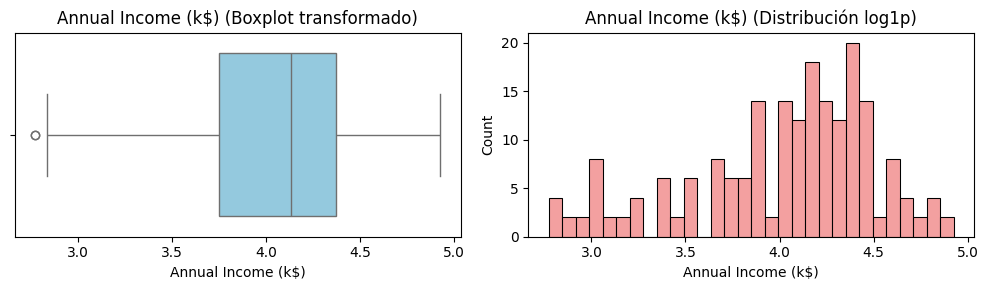

In [25]:
import seaborn as sns 

log1p_cols = ["Annual Income (k$)"] 
for col in log1p_cols: 
    df[col] = np.log1p(df[col].astype(float)) 
for col in log1p_cols: 
    fig, axes = plt.subplots(1, 2, figsize=(10, 3)) 
    sns.boxplot(x=df[col], ax=axes[0], color='skyblue') 
    axes[0].set_title(f'{col} (Boxplot transformado)') 
    sns.histplot(df[col], bins=30, ax=axes[1], color='lightcoral') 
    axes[1].set_title(f'{col} (Distribución log1p)') 
plt.tight_layout() 
plt.show() 

<div style="background-color:green;color:white">

Tareas:
<br>
* Identifica qué variables son **numéricas** y cuáles **categóricas**
    - Numéricas: CustomerID, Age,  Annual Income (k$), Spending Score (1-100).
    - Objeto: Genre.
* Explica brevemente qué representa cada variable
    - CustomerID: Es el id identificador.
    - Age: Es la edad de los clientes.
    - Annual Income (k$): Ingresos anuales.
    - Spending Score (1-100): Puntuación de gasto.
    - Genero: El sexo de la persona.
* ¿faltan datos?
    - No faltan
* ¿Existen outliers?
    - Si, en Annual Income

<br>

<div style="background-color:green;color:white">

<br>

❓ **Pregunta**: 

¿Todas las variables son adecuadas para K-means tal como están?
- No porque existen outliers y costumer ID no nos da ninguna información

<br>

### 2. Selección de variables para el clustering

Para este ejercicio **NO se usarán todas las columnas**.

Selecciona únicamente:

* `Age`
* `Annual Income (k$)`
* `Spending Score (1-100)`

In [26]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

---

### 3. Preprocesado

Aplica escalado a los datos.


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<div style="background-color:green;color:white">

<br>

❓ **Pregunta**: 

 ¿Qué problema tendría K-means si no se escalan las variables en este dataset?
- Sin escalado domina la variable más grande e ignoraría más las otras
 
<br>

### 4. Elección del número de clusters

Evalúa valores de **K entre 2 y 10** usando al menos:

* Inercia (Elbow)
* Silhouette score


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, labels))


<div style="background-color:green;color:white">

<br>

* Representa ambas métricas gráficamente.

 
<br>

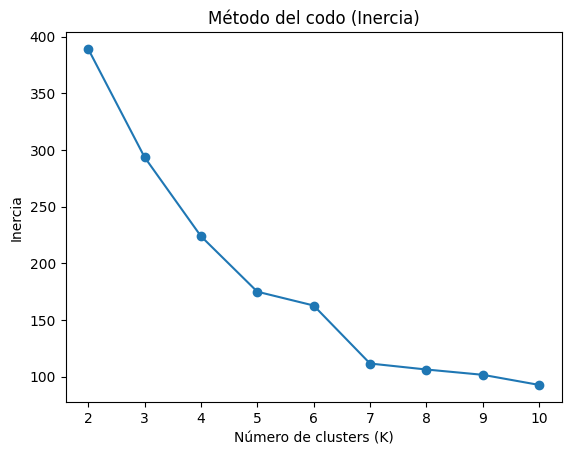

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia")
plt.title("Método del codo (Inercia)")
plt.show()

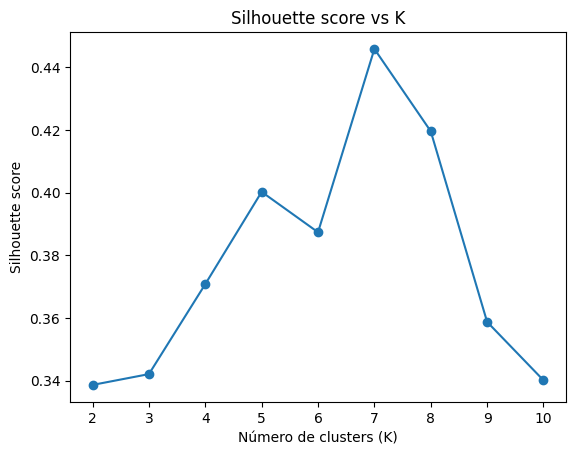

In [30]:
plt.figure()
plt.plot(K_range, silhouette, marker='o')
plt.xlabel("Número de clusters (K)")
plt.ylabel("Silhouette score")
plt.title("Silhouette score vs K")
plt.show()

<div style="background-color:green;color:white">

<br>

❓ **Pregunta**: 

¿Qué valor de K elegirías? Justifica la decisión. 
- K = 7 se elige porque la inercia deja de mejorar mucho y el silhouette alcanza su valor más alto

<br>

### Extra 

<div style="background-color:green;color:white">

<br>

Utiliza otros módelos para evaluar K.

¿Coincide con los anteriores?
- No, pero están bastante cerca.
    - Gaussian: 5 y 5
    - Jerárquico: 8

<br>

In [31]:
from sklearn.mixture import GaussianMixture
import numpy as np

Ks = range(2, 11)
bic, aic = [], []

for k in Ks:
    gmm = GaussianMixture(n_components=k, random_state=42, n_init=5)
    gmm.fit(X_scaled)
    bic.append(gmm.bic(X_scaled))
    aic.append(gmm.aic(X_scaled))

bic, aic

([np.float64(1662.7799629940985),
  np.float64(1624.19800751259),
  np.float64(1594.8941122903614),
  np.float64(1551.4207653879384),
  np.float64(1566.987381198068),
  np.float64(1589.0957295856394),
  np.float64(1614.0679624809686),
  np.float64(1639.9652329258458),
  np.float64(1672.887262980901)],
 [np.float64(1600.1119330296858),
  np.float64(1528.546803882697),
  np.float64(1466.2597349949879),
  np.float64(1389.8032144270846),
  np.float64(1372.386656571734),
  np.float64(1361.511831293825),
  np.float64(1353.5008905236737),
  np.float64(1346.4149873030706),
  np.float64(1346.3538436926453)])

In [32]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

Ks = range(2, 11)
sil_agg = []

for k in Ks:
    agg = AgglomerativeClustering(n_clusters=k, linkage="ward")
    labels = agg.fit_predict(X_scaled)
    sil_agg.append(silhouette_score(X_scaled, labels))

sil_agg

[np.float64(0.32916741327301113),
 np.float64(0.3230749331488391),
 np.float64(0.3512909346102178),
 np.float64(0.38339499863833565),
 np.float64(0.42032477946970603),
 np.float64(0.4137323070198306),
 np.float64(0.42620539675855434),
 np.float64(0.4197662441725931),
 np.float64(0.41856442357869694)]

### Entrenamiento 


<div style="background-color:green;color:white">

<br>

Entrena el **modelo definitivo de K-means** utilizando el valor de **K seleccionado en el análisis previo**.

1. Entrena el modelo K-means con dicho valor de K y obtén las etiquetas de clúster para cada muestra.

2. Comprueba que el número de clústeres generados coincide con el valor de K seleccionado.

<br>


In [33]:
from sklearn.cluster import KMeans

K = 7

kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)   

In [34]:
n_clusters_generados = len(set(labels))
print("Clusters generados:", n_clusters_generados)
print("K seleccionado:", K)

Clusters generados: 7
K seleccionado: 7


---


## 6. Interpretación de los clusters

Hasta este punto hemos entrenado el modelo de clustering y asignado a cada muestra un clúster.
Sin embargo, **el resultado del algoritmo son solo etiquetas numéricas** (`0`, `1`, `2`, …), que **no tienen significado por sí mismas**.

En este apartado se analizarán los clústeres obtenidos para **entender qué caracteriza a cada grupo** y **en qué se diferencian entre sí**. Para ello se agruparán los datos por clúster y se calcularán **estadísticas descriptivas** de las variables originales, como la media, la dispersión y el tamaño de cada grupo.

Este análisis permite:

* comprobar si los clústeres tienen perfiles claros y diferenciados
* detectar clústeres muy pequeños, muy dispersos o poco relevantes
* relacionar los resultados del clustering con el problema original

La interpretación es un paso imprescindible, ya que **un clustering solo es útil si puede explicarse y utilizarse para tomar decisiones**.


<div style="background-color:green;color:white">



<br>

 * Añade la columna cluster al DataFrame


<br>

In [36]:
df["Cluster"] = labels

df["Cluster"].value_counts().sort_index()

Cluster
0    31
1    22
2    34
3    20
4    20
5    34
6    39
Name: count, dtype: int64


<div style="background-color:green;color:white">

<br>

* Analiza los clusters obtenidos agrupando a los clientes por clúster en un nuevo dataframe y calculando la media de las variables principales (Age, Annual Income y Spending Score) para cada grupo

 
<br>

In [38]:
cluster_summary = (df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean())

cluster_summary.round(2)

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,41.71,4.50,15.77
1,25.05,3.21,78.18
2,47.38,4.04,47.09
3,45.40,3.25,18.55
4,64.85,3.98,49.85
5,24.56,4.02,48.79
6,32.69,4.46,82.13


<div style="background-color:green;color:white">

<br>

* Describe **cada cluster como un perfil de cliente**
* Asigna una etiqueta comprensible (ej. *clientes jóvenes con alto gasto*)
    - Cluster 0: Adultos con ingresos altos y gasto bajo
    - Cluster 1: Jóvenes con alto gasto
    - Cluster 2: Adultos con gasto medio
    - Cluster 3: Clientes de bajo valor (bajo ingreso y bajo gasto)
    - Cluster 4: Clientes mayores con gasto moderado
    - Cluster 5: Jóvenes con potencial de crecimiento
    - Cluster 6: Clientes premium (alto ingreso y alto gasto)

<br>

<div style="background-color:green;color:white">

<br>

❓ **Pregunta**: 

* ¿Cómo usaría el departamento de marketing estos resultados?
    - El departamento de marketing puede usar los clusters para segmentar clientes y diseñar campañas personalizadas, centrándose en los perfiles más rentables y mejorando la eficacia de las promociones.

<br>

---

### 7. Visualización

<div style="background-color:green;color:white">

<br>

Representa los clusters:

* En 2D usando *Annual Income* vs *Spending Score*

<br>


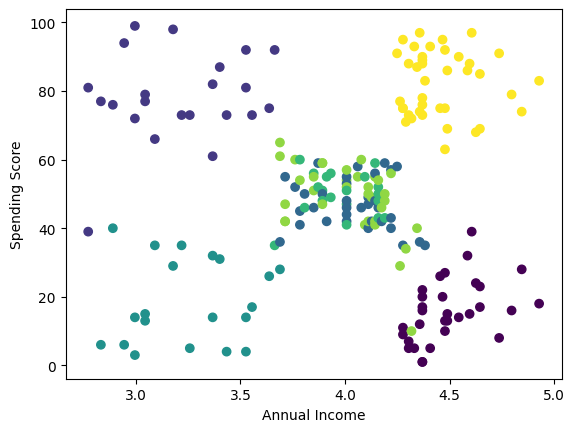

In [ ]:
plt.scatter(df["Annual Income (k$)"],
            df["Spending Score (1-100)"],
            c=df["Cluster"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

### Tarea extra (opcional) · Visualización 3D interactiva de los clústeres

En este apartado vas a crear una visualización en **3D** para observar los clústeres desde distintos ángulos. El objetivo es **comprobar visualmente** si los grupos están bien separados cuando se consideran **Age, Income y Spending Score a la vez**.

1. Crea un gráfico 3D **interactivo** donde:

   * Eje X: `Age`
   * Eje Y: `Annual Income (k$)`
   * Eje Z: `Spending Score (1-100)`
   * Color: `cluster`

2. Comprueba que el gráfico **se puede rotar, hacer zoom y desplazar** con el ratón.

3. Responde brevemente:






### Extra 

<div style="background-color:green;color:white">

<br>

Visualiza con PCA usando las tres variables en 2D.

<br>

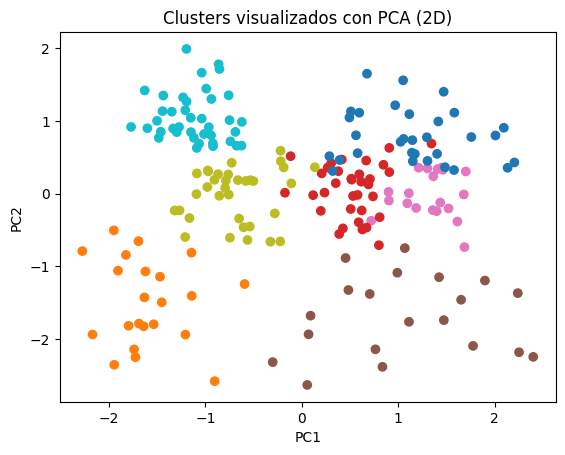

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["Cluster"], cmap="tab10")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters visualizados con PCA (2D)")
plt.show()

<div style="background-color:green;color:white">

<br>

❓ **Pregunta**: 

   * ¿Ves clústeres claramente separados en 3D o hay solapamientos?
      - En los extremos están bastantes separados, pero en la zona central hay solapamientos.
   * ¿Qué dos clústeres te parecen más parecidos visualmente?
      - Los clústeres más parecidos visualmente son los centrales, especialmente el rojo y el rosa, ya que presentan un mayor solapamiento.

<br>

---

### 8. Estabilidad y reproducibilidad del clustering

K-means depende de una inicialización aleatoria de los centroides iniciales. En este apartado se va a comprobar si el clustering obtenido es estable, es decir, si produce resultados similares cuando se repite el entrenamiento con distintas inicializaciones.

<div style="background-color:green;color:white">

<br>

1. Entrena el modelo K-means varias veces usando el mismo valor de **K**, pero cambiando la semilla (*random_state*).
2. Compara las asignaciones de clúster obtenidas en cada ejecución.
3. Utiliza el **Adjusted Rand Index (ARI)** para medir la similitud entre los distintos resultados.
4. Representa gráficamente los valores de ARI obtenidos.
5. Interpreta el resultado.
 
<br>

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

random_states = [0, 1, 2, 3, 4, 5, 10, 20, 42]
labels_list = []

for rs in random_states:
    kmeans = KMeans(n_clusters=7, random_state=rs, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    labels_list.append(labels)

In [49]:
ari_scores = []

reference_labels = labels_list[0]

for labels in labels_list[1:]:
    ari = adjusted_rand_score(reference_labels, labels)
    ari_scores.append(ari)

ari_scores

[1.0, 1.0, 1.0, 0.9766888177130624, 1.0, 1.0, 1.0, 0.9872216671723084]

Este análisis permite comprobar si el clustering es reproducible frente a distintas inicializaciones. Valores altos de ARI indican que el modelo obtiene agrupaciones similares de forma consistente, lo que refuerza la fiabilidad del resultado.

<div style="background-color:green;color:white">

<br>

* Visualizalo gráficamente
 
<br>


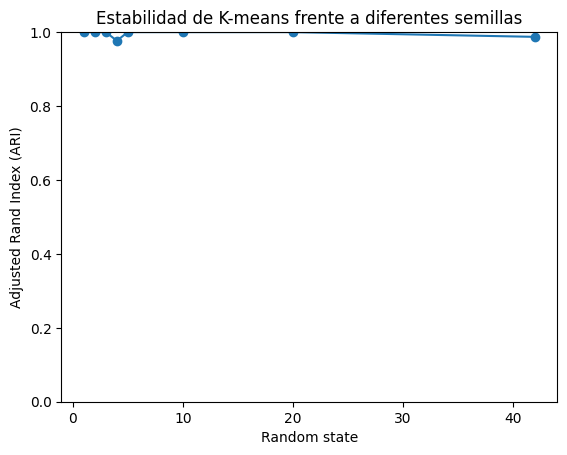

In [54]:
plt.figure()
plt.plot(random_states[1:], ari_scores, marker='o')
plt.xlabel("Random state")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.title("Estabilidad de K-means frente a diferentes semillas")
plt.ylim(0, 1)
plt.show()

<div style="background-color:green;color:white">

<br>

❓ **Pregunta**: 

* ¿Los valores de ARI son altos o bajos?
    - Altos cercanos a 1 e incluso 1

* ¿Qué indica esto sobre la estabilidad del clustering?
    - Cambiar la semilla no cambia prácticamente la asignación de los clústeres.

* ¿Podrías confiar en este resultado si el modelo se vuelve a entrenar en otro momento?
    - Si, el modelo produce los mismos clústeres aunque se entrene en otro momento.

<br>

---

### 9. Conclusión breve

<div style="background-color:green;color:white">

<br>

Redacta un breve texto (5–8 líneas) explicando:

* Qué clusters has encontrado
* Qué variables han sido más relevantes
* Qué limitaciones tiene K-means en este problema real
    - En este estudio se han encontrado varios tipos de clientes con comportamientos distintos, como jóvenes que gastan mucho, clientes con ingresos altos y gasto elevado, y otros más conservadores que apenas consumen. Las variables que más han influido han sido el ingreso anual y el nivel de gasto, ya que marcan claramente las diferencias entre los grupos, mientras que la edad ayuda a matizar los perfiles. Como limitación, K-means necesita que se indique el número de grupos antes de empezar y asume que todos los clusters tienen una forma parecida. Además, en un problema real puede haber solapamientos entre clientes que el modelo no consigue separar del todo.

<br>